0 1
10 2
50 3
100 4


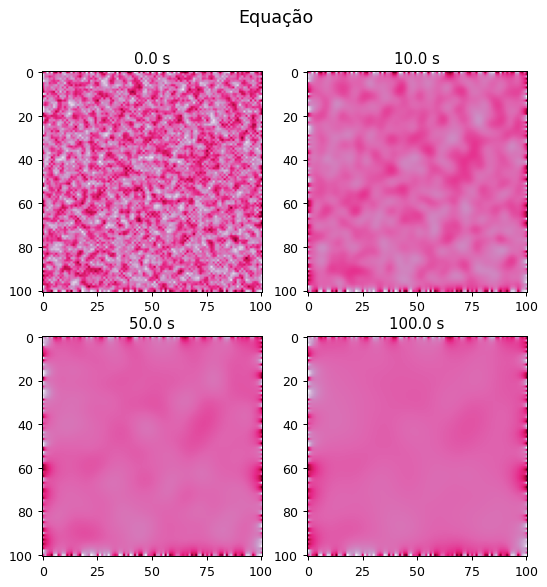

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# parametros 
nt = 101
nx = 101
ny = 101
dx = 1
dy = 1

# constante difusao
#D = 1

# incremento de tempo
dt = 0.2

# concentracao
u0 = (2 * np.random.rand(nx,ny) - 1) * 0.05

u = np.copy(u0)


def equacao(u0,u):
    for i in range(nt):
        u = np.copy(u0)
        for x in range(1, nx-1):
            for y in range(1, ny-1):
                u[x, y] = u0[x, y] + dt * (
                    (u0[x+1, y] - 2 * u0[x, y] + u0[x-1, y]) / dx**2 
                    + (u0[x, y+1] - 2 * u0[x, y] + u0[x, y-1]) / dy**2)
                + u0[x, y] + u0[x, y] ** 3
                

        u0 = np.copy(u)
        return u0, u

# passos de tempo
step_time = 1000

# plotar figuras nos seguintes passos de tempo
nfig = [0,10,50,100]
numfig = 0
fig = plt.figure(figsize=(8,7),dpi=90)
for n in range(step_time):
    u0, u = equacao(u0,u)
    if n in nfig:
        numfig += 1
        print(n,numfig)
        ax = fig.add_subplot(220 + numfig)
        im = ax.imshow(u0, cmap='PuRd')
        ax.set_title('{:.1f} s'.format(n))
fig.subplots_adjust(right=.8)
fig.suptitle('Equação', x=0.45,fontsize=14)
plt.show()